In [17]:
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Datasets/insurance.csv")

In [2]:
print(data.head(15))

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male     NaN  

In [3]:
count_nan = data.isnull().sum()
print(count_nan[count_nan>0])

bmi    5
dtype: int64


In [9]:
# option0 for dropping the entire column
data = pd.read_csv("Datasets/insurance.csv")
data.drop('bmi',axis = 1, inplace = True)
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [ ]:
# Option1 for dropping NAN
data = pd.read_csv("Datasets/insurance.csv")
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
count_nan = data.isnull().sum()
print(count_nan)

In [ ]:
'''
The Imputer fills missing values with some statistics 
(e.g. mean, median, ...) of the data.
To avoid data leakage during cross-validation, 
it computes the statistic on the train data during the fit, 
stores it and uses it on the test data, during the transform.
'''

In [18]:
# Option2 for filling NAN # reloading fresh dataset for option 2
data = pd.read_csv("Datasets/insurance.csv")
imputer = SimpleImputer(strategy='mean')
# reshape(-1,1) auto calulate rows
# imputer.fit
# can also do fit_transform
imputer.fit(data['bmi'].values.reshape(-1,1)) 
data['bmi'] =  imputer.transform(data['bmi'].values.reshape(-1,1))
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum()
print(count_nan)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
'''
A pairplot plot a pairwise relationships in a dataset. 
The pairplot function creates a grid of Axes such that each variable in data
will by shared in the y-axis across a single row and in the x-axis across a single column.
'''

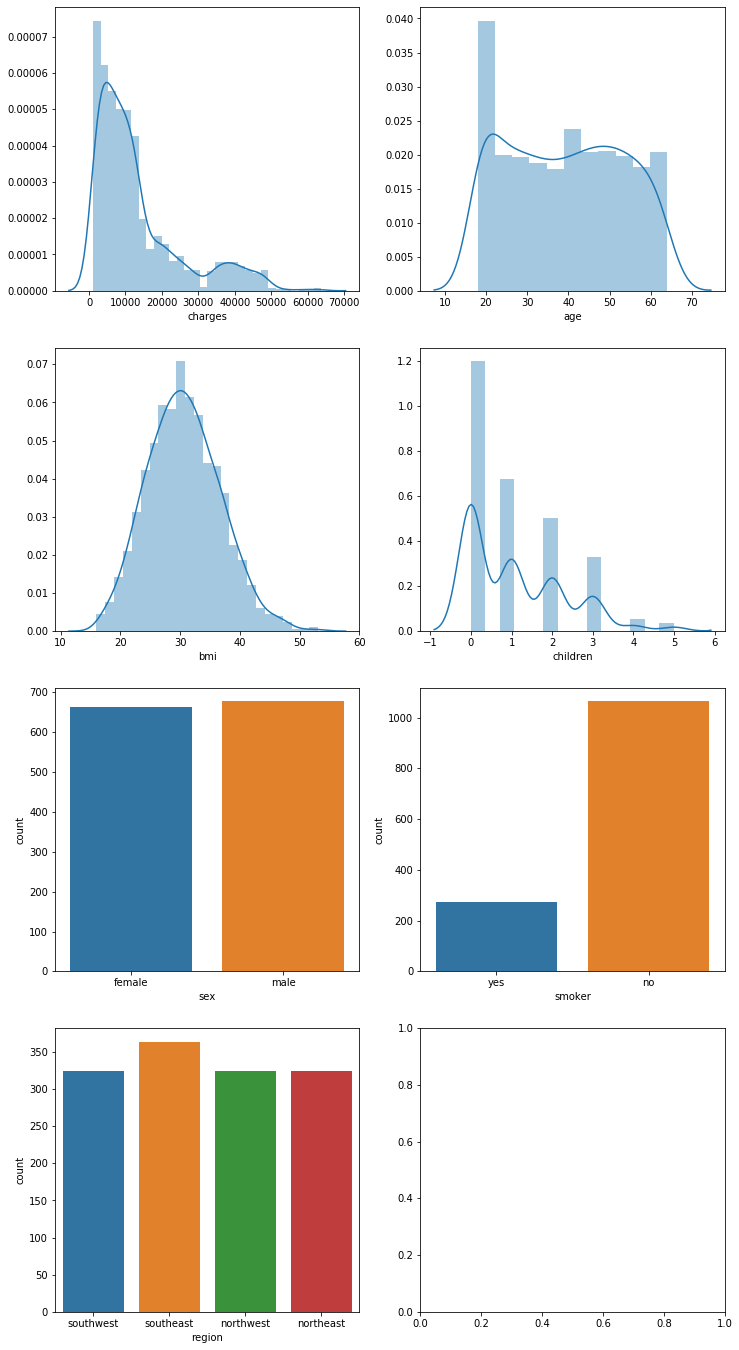

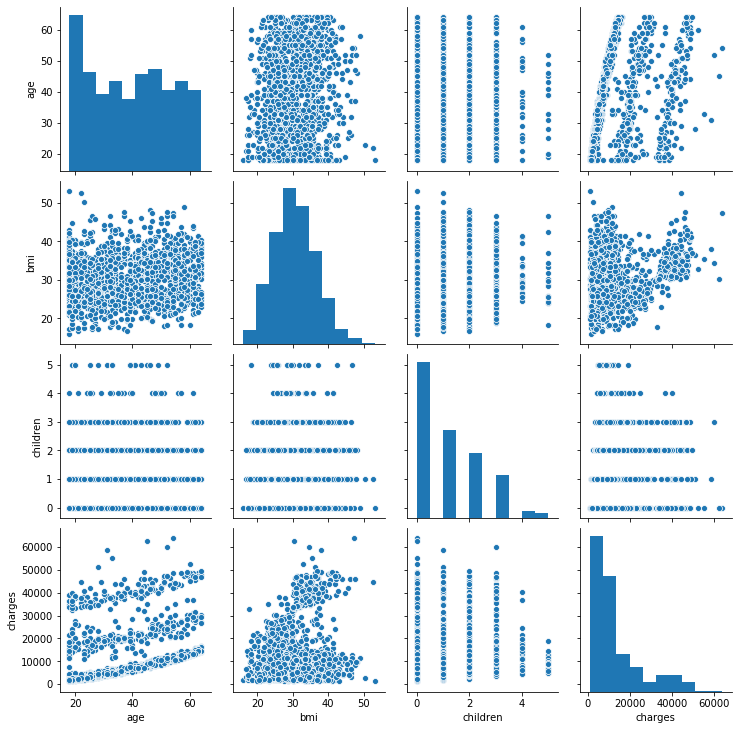

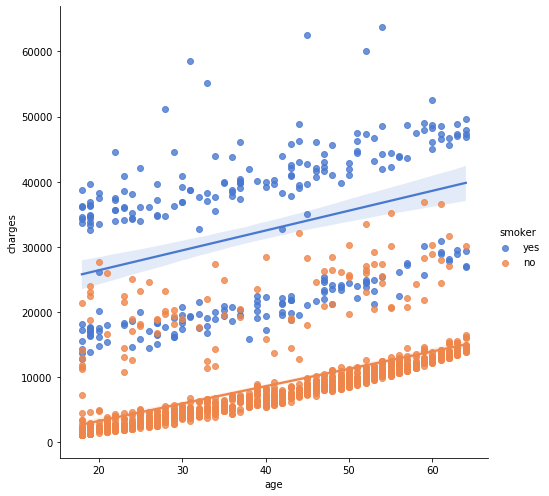

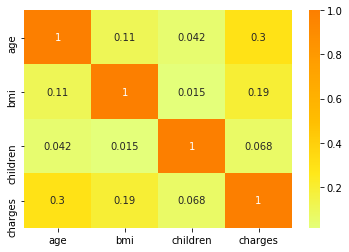

In [19]:

figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])



#visualizeing skewness
sns.pairplot(data)

#Lets look at smokers vs non-smokers on age vs charges:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 7)
plt.show(sns)

#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

In [ ]:
# convert categorical data into numbers
'''
label encoding - two distinct values 1 0 
==> sklearn Label Encoder
==> factorize()
One Hot encoding - three or more distinct values (new columns Blue Red Green 10,10,10)
==> sklearn OneHotEncoder()
==> get_dummies
'''



In [35]:
# The :2 tells python to return as dataframe rather than series (slicing)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

pandas.core.frame.DataFrame